In [1]:
import pandas as pd
import numpy as np
from scipy.spatial import distance
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Membaca dataset
df = pd.read_csv('hp.csv')

In [3]:
# Menampilkan nama kolom
print(df.columns)

Index(['id', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')


In [4]:
# Menampilkan statistik deskriptif
print(df.describe())

                id  battery_power         blue  clock_speed     dual_sim  \
count  1000.000000    1000.000000  1000.000000  1000.000000  1000.000000   
mean    500.500000    1248.510000     0.516000     1.540900     0.517000   
std     288.819436     432.458227     0.499994     0.829268     0.499961   
min       1.000000     500.000000     0.000000     0.500000     0.000000   
25%     250.750000     895.000000     0.000000     0.700000     0.000000   
50%     500.500000    1246.500000     1.000000     1.500000     1.000000   
75%     750.250000    1629.250000     1.000000     2.300000     1.000000   
max    1000.000000    1999.000000     1.000000     3.000000     1.000000   

                fc       four_g   int_memory        m_dep   mobile_wt  ...  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.00000  ...   
mean      4.593000     0.487000    33.652000     0.517500   139.51100  ...   
std       4.463325     0.500081    18.128694     0.280861    34.85155  ...   
min

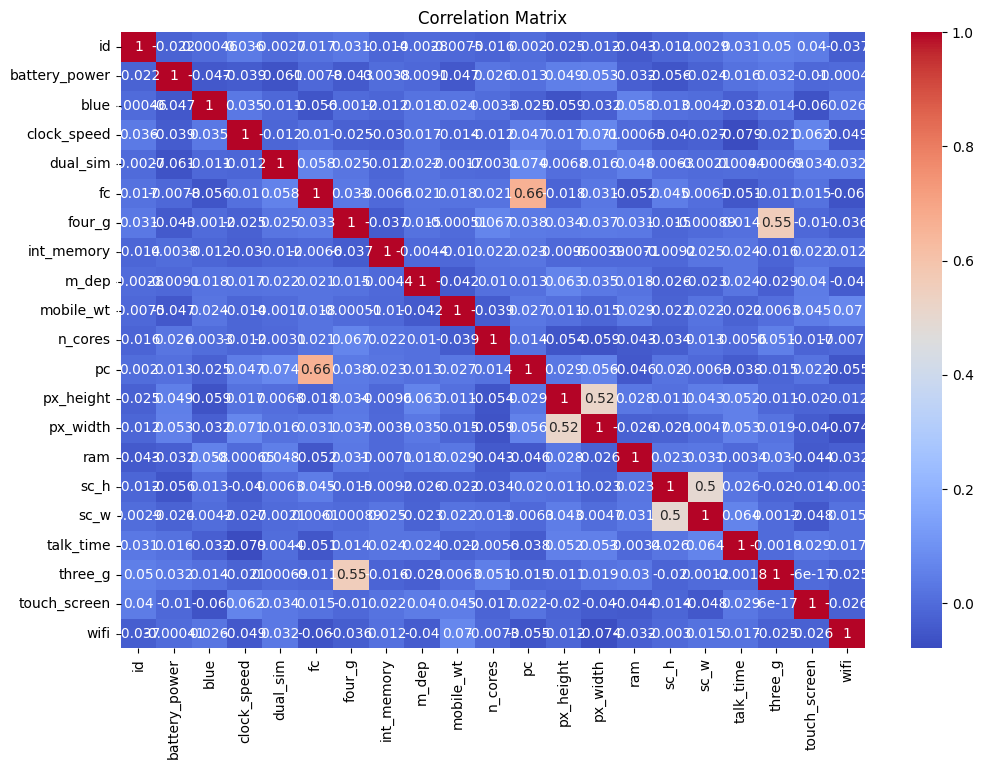

In [5]:
# Menampilkan matriks korelasi
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [6]:
# Menambahkan kolom target berdasarkan ram
df['price_category'] = pd.cut(df['ram'], bins=4, labels=[0, 1, 2, 3])

# Memilih fitur dan label, serta menghapus kolom id
X = df.drop(columns=['id', 'price_category'])
y = df['price_category']

# Mengatasi missing values
X = X.fillna(X.mean())

# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:

# Menggunakan RandomForest untuk menentukan pentingnya fitur
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [8]:
# Mendapatkan pentingnya fitur
feature_importances = pd.DataFrame(rf.feature_importances_, index=X.columns, columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

               importance
ram              0.568855
px_height        0.040013
px_width         0.039336
battery_power    0.039198
int_memory       0.037412
mobile_wt        0.033351
pc               0.030192
sc_w             0.028192
talk_time        0.027171
clock_speed      0.027029
sc_h             0.025479
fc               0.024126
m_dep            0.022796
n_cores          0.019239
dual_sim         0.007096
wifi             0.007079
blue             0.006901
touch_screen     0.006058
four_g           0.005789
three_g          0.004690


In [9]:
# Nilai mean tiap fitur
mean_values = X.mean()
print(mean_values)

battery_power    1248.5100
blue                0.5160
clock_speed         1.5409
dual_sim            0.5170
fc                  4.5930
four_g              0.4870
int_memory         33.6520
m_dep               0.5175
mobile_wt         139.5110
n_cores             4.3280
pc                 10.0540
px_height         627.1210
px_width         1239.7740
ram              2138.9980
sc_h               11.9950
sc_w                5.3160
talk_time          11.0850
three_g             0.7560
touch_screen        0.5000
wifi                0.5070
dtype: float64


In [10]:
# Fungsi simple distance-based classifier
def simple_distance_classifier(X_train, y_train, X_test):
    predictions = []
    for test_point in X_test:
        # Menghitung jarak Euclidean dari test_point ke semua titik di X_train
        distances = np.array([distance.euclidean(test_point, x) for x in X_train])
        # Mendapatkan index dari titik terdekat
        nearest_index = np.argmin(distances)
        # Menambahkan kelas dari titik terdekat ke daftar prediksi
        predictions.append(y_train.iloc[nearest_index])
    return predictions

# Mengonversi X_test ke dalam numpy array untuk komputasi jarak
X_test_array = X_test.to_numpy()

# Memanggil fungsi classifier
predictions = simple_distance_classifier(X_train.to_numpy(), y_train, X_test_array)

# Mengonversi prediksi ke dalam bentuk array untuk plotting
predictions = np.array(predictions)

# Definisikan label kelas harga
class_labels = {
    0: 'Murah',
    1: 'Sedang',
    2: 'Mahal',
    3: 'Sangat Mahal'
}

# Menampilkan hasil prediksi dengan label kelas harga
for i, test_point in enumerate(X_test_array):
    print(f"Data: {test_point}, Prediksi Kelas: {class_labels[predictions[i]]}")

Data: [7.560e+02 0.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00 3.300e+01
 2.000e-01 1.770e+02 1.000e+00 3.000e+00 5.060e+02 5.730e+02 3.402e+03
 1.900e+01 0.000e+00 3.000e+00 1.000e+00 1.000e+00 0.000e+00], Prediksi Kelas: Sangat Mahal
Data: [1.341e+03 0.000e+00 1.400e+00 0.000e+00 8.000e+00 1.000e+00 3.800e+01
 1.000e+00 1.700e+02 5.000e+00 1.000e+01 6.010e+02 9.370e+02 1.579e+03
 1.600e+01 4.000e+00 1.900e+01 1.000e+00 0.000e+00 1.000e+00], Prediksi Kelas: Sedang
Data: [1.803e+03 1.000e+00 2.600e+00 0.000e+00 7.000e+00 1.000e+00 9.000e+00
 9.000e-01 1.120e+02 2.000e+00 1.200e+01 1.560e+02 1.289e+03 4.060e+02
 9.000e+00 3.000e+00 5.000e+00 1.000e+00 0.000e+00 0.000e+00], Prediksi Kelas: Murah
Data: [1.023e+03 1.000e+00 2.800e+00 1.000e+00 1.600e+01 0.000e+00 4.400e+01
 7.000e-01 1.760e+02 4.000e+00 1.700e+01 6.290e+02 1.158e+03 1.830e+03
 1.400e+01 1.100e+01 6.000e+00 0.000e+00 0.000e+00 0.000e+00], Prediksi Kelas: Sedang
Data: [1.745e+03 0.000e+00 1.800e+00 0.000e+00 0.000e+00 0.

In [11]:
# Menghitung akurasi
accuracy = accuracy_score(y_test, predictions)
print(f'Akurasi: {accuracy}')

Akurasi: 0.93


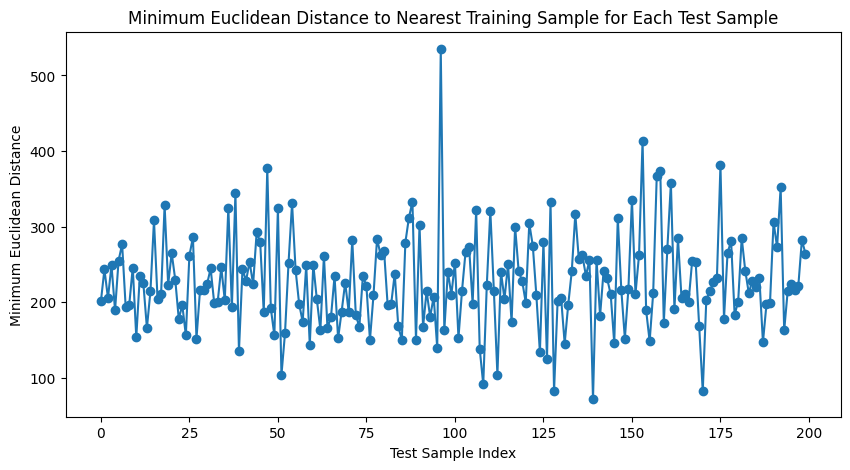

In [12]:
# Menampilkan minimum Euclidean Distance untuk setiap test sample
min_distances = []
for test_point in X_test_array:
    distances = np.array([distance.euclidean(test_point, x) for x in X_train.to_numpy()])
    min_distances.append(np.min(distances))

plt.figure(figsize=(10, 5))
plt.plot(min_distances, marker='o')
plt.xlabel('Test Sample Index')
plt.ylabel('Minimum Euclidean Distance')
plt.title('Minimum Euclidean Distance to Nearest Training Sample for Each Test Sample')
plt.show()

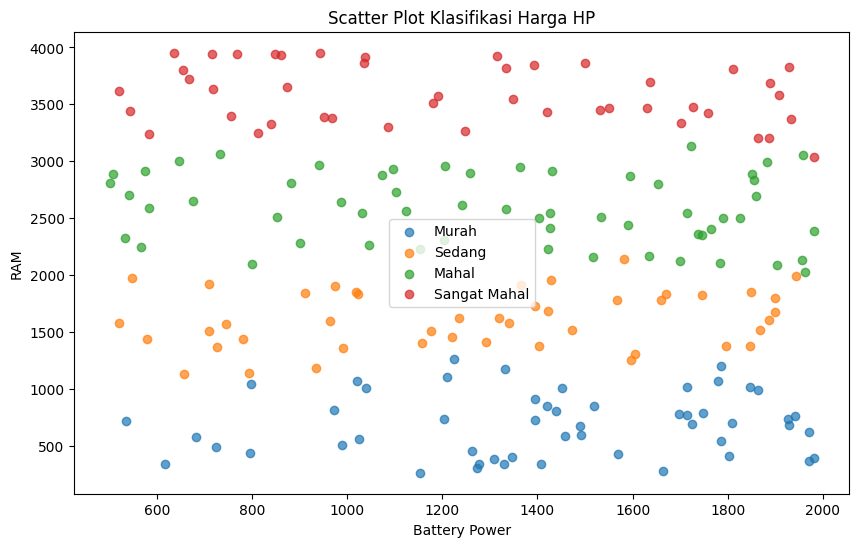

In [13]:
# Menentukan dua fitur untuk scatter plot klasifikasi harga, misalnya battery_power dan ram
plt.figure(figsize=(10, 6))

# Scatter plot untuk setiap kategori harga
for category in np.unique(predictions):
    idx = predictions == category
    plt.scatter(X_test_array[idx, X.columns.get_loc('battery_power')],
                X_test_array[idx, X.columns.get_loc('ram')],
                label=class_labels[category], alpha=0.7)

plt.xlabel('Battery Power')
plt.ylabel('RAM')
plt.title('Scatter Plot Klasifikasi Harga HP')
plt.legend()
plt.show()

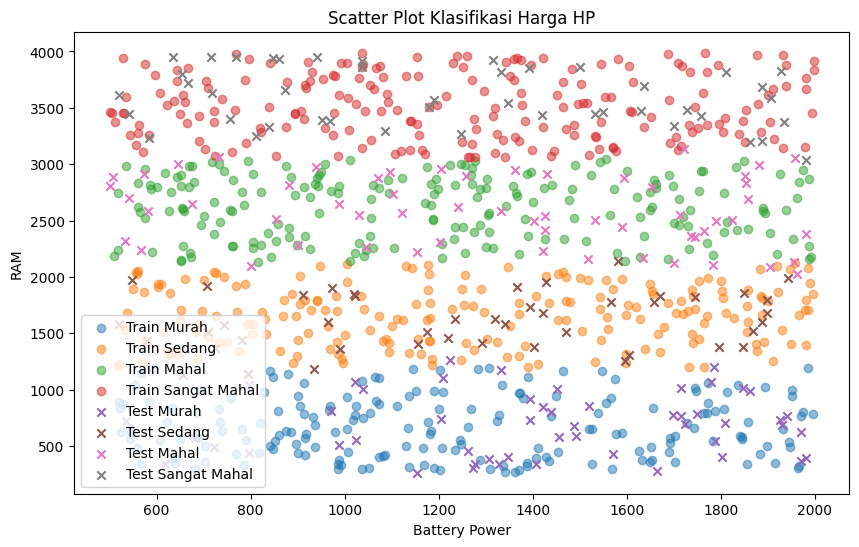

In [14]:
# Menentukan dua fitur untuk scatter plot untuk data latih dan uji, misalnya battery_power dan ram
plt.figure(figsize=(10, 6))

# Scatter plot untuk data latih
for category in np.unique(y_train):
    idx = y_train == category
    plt.scatter(X_train.loc[idx, 'battery_power'],
                X_train.loc[idx, 'ram'],
                label=f'Train {class_labels[category]}', alpha=0.5)

# Scatter plot untuk data uji
for category in np.unique(predictions):
    idx = predictions == category
    plt.scatter(X_test_array[idx, X.columns.get_loc('battery_power')],
                X_test_array[idx, X.columns.get_loc('ram')],
                label=f'Test {class_labels[category]}', marker='x')

plt.xlabel('Battery Power')
plt.ylabel('RAM')
plt.title('Scatter Plot Klasifikasi Harga HP')
plt.legend()
plt.show()

In [15]:
# Membuat DataFrame untuk hasil prediksi
results_df = X_test.copy()
results_df['Actual_Price_Label'] = y_test
results_df['Predicted_Price_Category'] = predictions
results_df['Predicted_Price_Label'] = results_df['Predicted_Price_Category'].map(class_labels)

In [16]:
# Menampilkan beberapa baris pertama dari tabel hasil
results_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,Actual_Price_Label,Predicted_Price_Category,Predicted_Price_Label
521,756,0,1.0,0,0,0,33,0.2,177,1,...,3402,19,0,3,1,1,0,3,3,Sangat Mahal
737,1341,0,1.4,0,8,1,38,1.0,170,5,...,1579,16,4,19,1,0,1,1,1,Sedang
740,1803,1,2.6,0,7,1,9,0.9,112,2,...,406,9,3,5,1,0,0,0,0,Murah
660,1023,1,2.8,1,16,0,44,0.7,176,4,...,1830,14,11,6,0,0,0,1,1,Sedang
411,1745,0,1.8,0,0,0,45,0.1,110,2,...,2352,11,9,16,1,0,1,2,2,Mahal
